In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [25]:
unmatched_transactions = pd.read_csv('unmatched_transactions.csv')

In [26]:
unmatched_transactions.head()

,amount,company,dc_indicator,document,document_currency_amount,document_currency_key,document_reference,gl,gl_account_description,gl_account_name,gl_updating_amount,item_text,line_number,messages_test,second_local_amount,third_local_amount,vendor
0,1.00,A000,H,1700010014,1.00,USD,CITI-TEST-01,61004060,This account is used to record the freight cha...,Freight inwards charges - Air,1.00,CITI Bank test run,2,citi bank test run account use record freight ...,199.60,1.00,NaN
1,1.00,A000,H,1900461265,1.00,USD,CITI-TEST-01,34001010,This account is used to record the freight cha...,Freight inwards charges - Air,1.00,CITI Bank test run,1,citi bank test run account use record freight ...,199.60,1.00,304285
2,1.00,A000,H,1900466104,1.00,USD,CITI-TEST-22,34001010,This account is used to record the freight cha...,Freight inwards charges - Air,1.00,NaN,1,account use record freight charg incur import ...,197.49,1.00,304285
3,1.00,A000,H,1700010017,1.00,USD,CITI-TEST-22,61004060,This account is used to record the freight cha...,Freight inwards charges - Air,1.00,CITI Bank test run,2,citi bank test run account use record freight ...,197.49,1.00,NaN
4,961.75,A000,H,1900473664,961.75,USD,CMB8000363,34001010,This account is used to record the freight cha...,Freight inwards charges - Air,961.75,Warehouse Charges - HMSC Mattakkuliya,1,warehous charg hmsc mattakkuliya account use r...,190484.21,961.75,304285


In [27]:
unmatched_transactions.shape

(9177, 17)

In [28]:
unmatched_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9177 entries, 0 to 9176
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amount                    9177 non-null   float64
 1   company                   9177 non-null   object 
 2   dc_indicator              9177 non-null   object 
 3   document                  9177 non-null   int64  
 4   document_currency_amount  9177 non-null   float64
 5   document_currency_key     9177 non-null   object 
 6   document_reference        9177 non-null   object 
 7   gl                        9177 non-null   int64  
 8   gl_account_description    9177 non-null   object 
 9   gl_account_name           9177 non-null   object 
 10  gl_updating_amount        9177 non-null   float64
 11  item_text                 8230 non-null   object 
 12  line_number               9177 non-null   int64  
 13  messages_test             9177 non-null   object 
 14  second_l

In [29]:
unmatched_transactions.isnull().sum()

amount                         0
company                        0
dc_indicator                   0
document                       0
document_currency_amount       0
document_currency_key          0
document_reference             0
gl                             0
gl_account_description         0
gl_account_name                0
gl_updating_amount             0
item_text                    947
line_number                    0
messages_test                  0
second_local_amount            0
third_local_amount             0
vendor                      6636
dtype: int64

In [30]:
dataset1_v1 = unmatched_transactions.iloc[:,[7,8,11,16]].values

In [31]:
print(dataset1_v1)

[[61004060
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  'CITI Bank test run' nan]
 [34001010
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  'CITI Bank test run' '304285']
 [34001010
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  nan '304285']
 ...
 [61004060
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  'VLL703780' nan]
 [61004060
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  'VLL703861' nan]
 [34002020
  'This account is used to record the freight charges incurred when importing raw materials for production by air.'
  'Credit Note' '304285']]


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [33]:
dataset2 = unmatched_transactions['item_text'].values.astype("U")

In [34]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(dataset2)

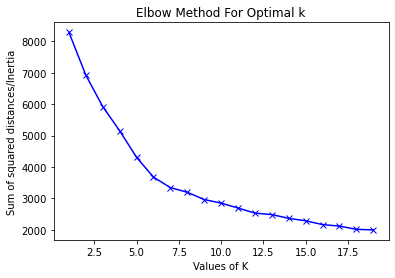

In [35]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
silhouette_score(features, kmeans.labels_)

0.7359760076759718

In [37]:

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features) for k in range(1,30)]

silhouette_scores = [silhouette_score(features, model.labels_)
                    for model in kmeans_per_k[1:]]
silhouette_scores

[0.2139909595259671,
 0.3216499816930453,
 0.412531864330293,
 0.514277782647361,
 0.5798447863487449,
 0.5844190673673825,
 0.6100842940589184,
 0.6289383443882007,
 0.6493264836524142,
 0.6659546481615205,
 0.6606145251486853,
 0.6832319022577676,
 0.6917885081152101,
 0.6930435619300807,
 0.7147802743883366,
 0.716007761062708,
 0.72774519428315,
 0.7328041246859213,
 0.7419664523395647,
 0.7482673136942362,
 0.7521003324887721,
 0.7337214402970932,
 0.7566008708962071,
 0.7707194321642824,
 0.7669197813703796,
 0.7657143115222838,
 0.7754044447047453,
 0.774273082649117]

In [38]:
max_value = max(silhouette_scores)
max_index = silhouette_scores.index(max_value)

print(max_value)
print(max_index)

0.7754044447047453
26


In [39]:
k = max_index + 2

In [40]:
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=28, n_init=1)

In [41]:
unmatched_transactions['cluster'] = model.labels_

In [28]:
unmatched_transactions.to_csv('data_cluster_list.csv')

In [24]:
# output the result to a text file

clusters = unmatched_transactions.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['gl','gl_account_description','item_text','vendor']] #get selected columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

In [23]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('----------------')

Cluster centroids: 

Cluster 0:
 non
 cof
 ref
 gon07100116
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
----------------
Cluster 1:
 wht
 glx
 zrh35053915
 gon07100098
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
----------------
Cluster 2:
 nan
 gon07100116
 hmsc
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
 half
----------------
Cluster 3:
 import
 zrh35053915
 gon07100098
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
 half
----------------
Cluster 4:
 impor
 zrh35053915
 gon07100098
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
 half
----------------
Cluster 5:
 ref
 zrh35053915
 gon07100098
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
 half
----------------
Cluster 6:
 vat
 glx
 zrh35053915
 hk
 hartrodt
 hangzhou
 hang
 handling
 han
 half
----------------
Cluster 7:
 imp2020
 s1
 26
 27
 import
 28
 zrh35053915
 goods
 hmsc
 hk
----------------
Cluster 8:
 crgs
 forwarder
 import
 purpose
 courier
 ksr
 hartrodt
 everest
 panah
 perdana
----------------
Cluster 9:
 imp2021
 s2
 im